# Table of Contents
 <p>

In [26]:
import pandas as pd
import numpy as np
import scipy as scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numba
import maxentropy
from matplotlib import rc

# plotting settings
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

# more parameters
mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14


from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
import os

import scipy.io as sio

In [104]:
# load kato data
fps = 30.3
frames1 = []
for root, dirs, files in os.walk('../input/kato_data/nostim', topdown=False):
    for i, file in enumerate(files):
        mat = sio.loadmat('../input/kato_data/nostim/' + file)

        npmat = np.array(mat['neuronTraces'].tolist())
        smoothnpmat = savgol_filter(npmat, int(np.floor(fps) + 1), 2)

        columns = [a[0] for a in mat['neuronNames'][0]]
        columns2 = [a[0] + '_smooth' for a in mat['neuronNames'][0]]

        temp = pd.DataFrame(npmat)
        temp2 = pd.DataFrame(smoothnpmat)
        temp.columns = columns
        temp2.columns = columns2
        temp['frame'] = temp.index
        temp = pd.concat([temp, temp2], axis=1)
        temp = temp.melt(id_vars='frame', var_name='Neuron', value_name='Fluorescence')
        print(temp.Neuron.unique())
        temp['animal'] = i
        frames += [temp]
df = pd.concat(frames)

['RMER' 'RMED' 'RMEL' 'RID' 'RMEV' 'AVAL' 'SMDVL' 'ASKR' 'AVER' 'SMDVR'
 'ALA' 'AIBR' 'AVEL' 'AVBR' 'AVHL' 'AVHR' 'AVBL' 'SIADL' 'AIBL' 'RIVL'
 'RIMR' 'RIVR' 'SMBDL' 'RIML' 'SMBDR' 'RIBL' 'RIS' 'VB02' 'AVFR' 'VB01'
 'AVAR' 'RIBR' 'RMER_smooth' 'RMED_smooth' 'RMEL_smooth' 'RID_smooth'
 'RMEV_smooth' 'AVAL_smooth' 'SMDVL_smooth' 'ASKR_smooth' 'AVER_smooth'
 'SMDVR_smooth' 'ALA_smooth' 'AIBR_smooth' 'AVEL_smooth' 'AVBR_smooth'
 'AVHL_smooth' 'AVHR_smooth' 'AVBL_smooth' 'SIADL_smooth' 'AIBL_smooth'
 'RIVL_smooth' 'RIMR_smooth' 'RIVR_smooth' 'SMBDL_smooth' 'RIML_smooth'
 'SMBDR_smooth' 'RIBL_smooth' 'RIS_smooth' 'VB02_smooth' 'AVFR_smooth'
 'VB01_smooth' 'AVAR_smooth' 'RIBR_smooth']
['OLQVR' 'OLQVL' 'OLQDL' 'RMEL' 'RMER' 'RMED' 'RID' 'RMEV' 'SMDVR' 'AVAL'
 'AVAR' 'ALA' 'SMDVL' 'AVER' 'AIBR' 'AVBR' 'AIBL' 'RIVR' 'RIMR' 'RIVL'
 'AVBL' 'RIBL' 'RIML' 'SMBVR' 'VB02' 'RIFR' 'SABVL' 'AVFL' 'OLQDR' 'VB01'
 'DB02' 'VA01' 'DB01' 'OLQVR_smooth' 'OLQVL_smooth' 'OLQDL_smooth'
 'RMEL_smooth' 'RMER_smooth

In [101]:
df.Neuron.unique()

array(['RMER', 'RMED', 'RMEL', 'RID', 'RMEV', 'AVAL', 'SMDVL', 'ASKR',
       'AVER', 'SMDVR', 'ALA', 'AIBR', 'AVEL', 'AVBR', 'AVHL', 'AVHR',
       'AVBL', 'SIADL', 'AIBL', 'RIVL', 'RIMR', 'RIVR', 'SMBDL', 'RIML',
       'SMBDR', 'RIBL', 'RIS', 'VB02', 'AVFR', 'VB01', 'AVAR', 'RIBR',
       'OLQVR', 'OLQVL', 'OLQDL', 'SMBVR', 'RIFR', 'SABVL', 'AVFL',
       'OLQDR', 'DB02', 'VA01', 'DB01', 'URYDR', 'URYDL', 'BAGL', 'SAAVR',
       'SAAVL', 'ASKL', 'SIBVR', 'SMBVL', 'RIGR', 'SABD', 'RIGL', 'AS01',
       'DA01', 'SABVR', 'SIBVL'], dtype=object)

Text(0,0.5,'Non-normalized intensity')

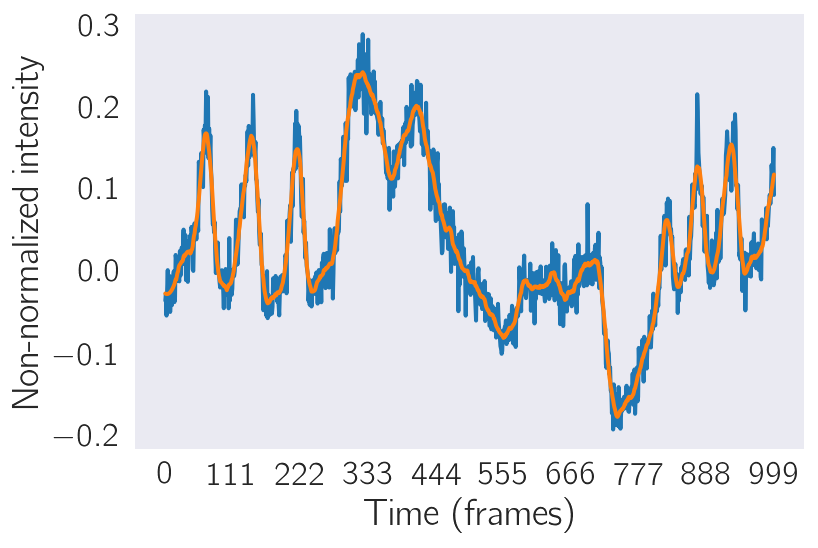

In [56]:
nmax = 1000
x1 = x[1, :nmax]
x2 = smooth_x[1, :nmax]
l = plt.plot(x1, label='raw')
l = plt.plot(x2, label='smoothed')
xticks = plt.xticks(np.linspace(0, nmax-1, int(np.floor(nmax/100))))

plt.xlabel('Time (frames)')
plt.ylabel('Non-normalized intensity')

In [62]:
pca = PCA(2)
tX = pca.fit_transform(smooth_x)
pca.explained_variance_ratio_

array([0.60945691, 0.14871764])

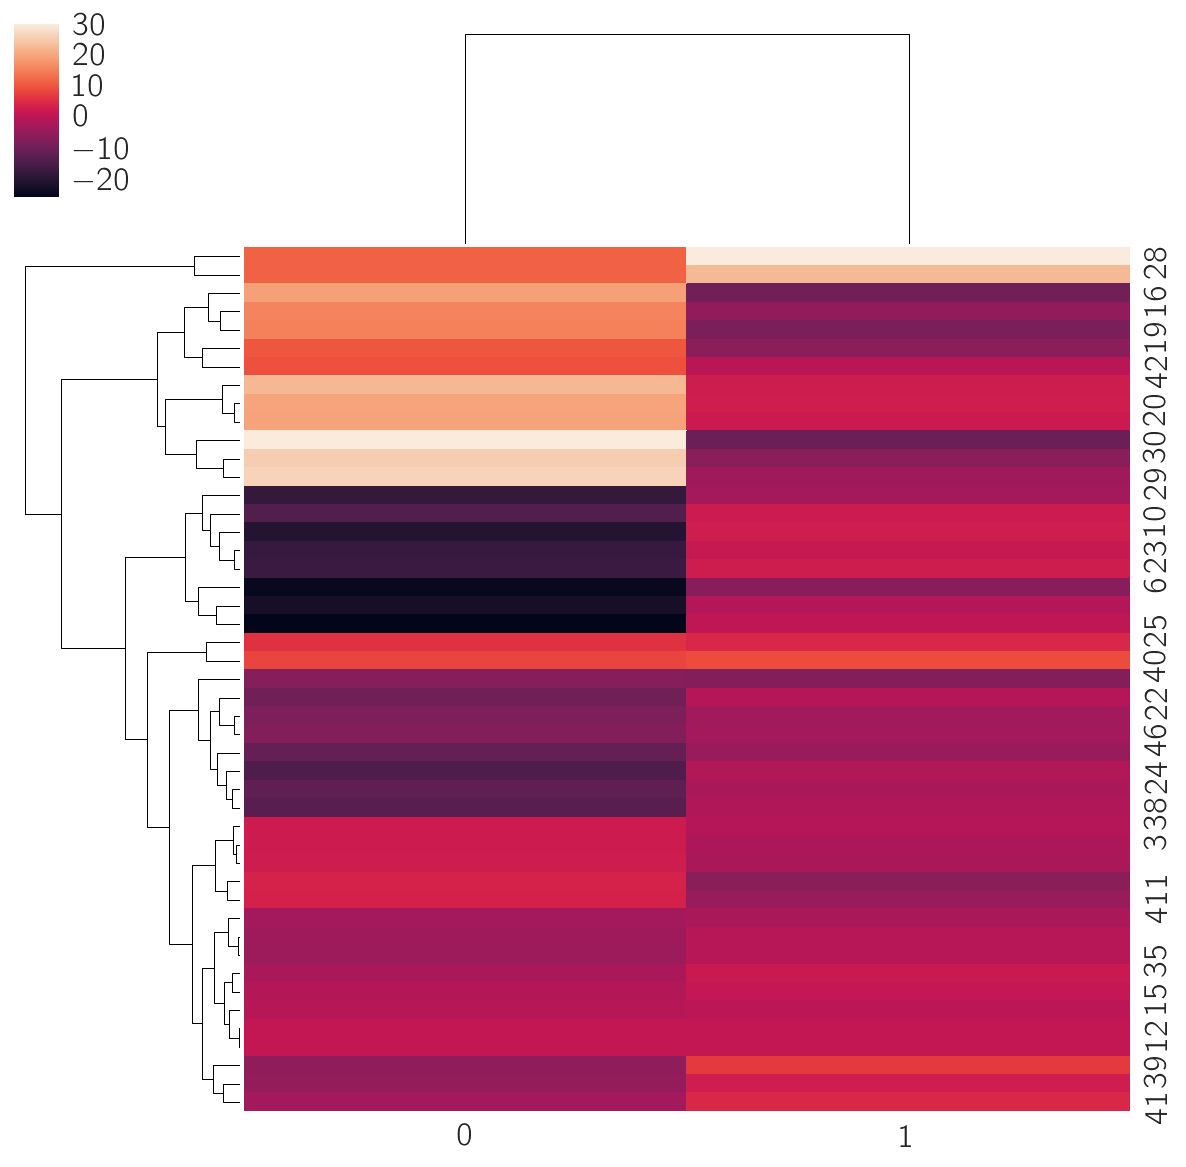

In [60]:
sns.clustermap(tX)